# Predicting Successful Kickstarter Project

# Abstract

(Insert abstract here)

# What is Kickstarter

To put it in their own words “Kickstarter helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality. To date, tens of thousands of creative projects — big and small — have come to life with the support of the Kickstarter community.”

It is a platform that allows creators to transform ideas through the use of crowdfunding from backers in order to create tangible products. Creators are the people that set deadlines with funding goals that need to be met in order for them to create their projects, as well as stretch goals that may be created if that goal is surpassed. Projects can also have their deadlines extended and funding goals adjusted after the fact

# About the Data

In our dataset lies a collection of 378,661 projects from 2009 to January 2018 that contain a wide variety of project types and goals. The columns provided in our dataset are
1. The project ID
2. The project name
3. Category
4. Main category
5. Currency type (USD,  EUR, GBP, etc.)
6. Deadline
7. Goal
8. Launch date
9. Pledged amount
10. State of the project (Successful, failed, cancelled, live, suspended)
11. Number of backers
12. Country of origin
13. USD pledged
14. USD pledged real
15. USD goal real

# Research Question

Now, the goal of this project is to determine what factors ultimately determine the success (or failure) of a kickstarter project.




In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data and sort by deadline date
kickstart_data = pd.read_csv("ks-projects-201801.csv")
kickstart_data.dropna().sort_values('deadline')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.00,successful,3,US,35.00,35.00,20.00
342226,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,300.0,2009-04-29 05:26:32,15.00,failed,2,US,15.00,15.00,300.00
213711,2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,3000.0,2009-04-28 13:55:41,3329.00,successful,110,US,3329.00,3329.00,3000.00
28960,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,USD,2009-05-20,300.0,2009-04-30 22:10:30,40.00,failed,4,US,40.00,40.00,300.00
196244,199916122,Mr. Squiggles,Illustration,Art,USD,2009-05-22,30.0,2009-05-12 23:39:58,0.00,failed,0,US,0.00,0.00,30.00
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,387.00,failed,10,US,387.00,387.00,1900.00
148270,1753686817,Help Me Open a Publishing House for Young Authors,Publishing,Publishing,USD,2009-05-29,3000.0,2009-05-06 15:27:19,100.00,failed,1,US,100.00,100.00,3000.00
235255,266044220,Help me write my second novel.,Fiction,Publishing,USD,2009-05-29,500.0,2009-04-29 02:58:50,563.00,successful,18,US,563.00,563.00,500.00
345606,830477146,Web Site for Short Horror Film,Shorts,Film & Video,USD,2009-05-29,200.0,2009-04-29 02:04:21,41.00,failed,3,US,41.00,41.00,200.00
357003,888658718,samcclure.com - a wine and food blog (Canceled),Food,Food,USD,2009-05-31,2000.0,2009-05-04 22:49:04,350.00,canceled,2,US,350.00,350.00,2000.00


In [3]:
# Check the size of our dataset
kickstart_data.shape

(378661, 15)

In [4]:
# Print out column names and # of unique values in each categorical variable
kickstart_data.select_dtypes(include=['object']).nunique()

name             375764
category            159
main_category        15
currency             14
deadline           3164
launched         378089
state                 6
country              23
dtype: int64

In [5]:
kickstart_data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
# Convert 'launched' and 'deadline' columns into dates
kickstart_data['launched'] = kickstart_data['launched'].astype('datetime64[ns]')
kickstart_data['deadline'] = pd.to_datetime(kickstart_data['deadline'])
kickstart_data['launched'] = pd.DatetimeIndex(kickstart_data.launched).normalize()

# Project duration is more useful and less data
# than the launch date and deadline
kickstart_data['duration'] = kickstart_data['deadline'] - kickstart_data['launched']
kickstart_data['duration'] = (kickstart_data['duration'] / np.timedelta64(1, 'D')).astype(int)

# Drop variables that have no relation to state, and
# variables that have over 15 unique values
kickstart_data.drop(['ID', 'name', 'category', 'launched', 'deadline', 
                     'currency', 'goal', 'pledged', 'usd pledged'], 1, inplace=True)

# Rename usd_pledged_real and usd_goal_real to 
# pledged and goal
kickstart_data = kickstart_data.rename(index=str, columns = {'usd_pledged_real': 'pledged', 
                                                             'usd_goal_real': 'goal', 
                                                             'main_category': 'category'})

# Let's create a new variable, pledged% to show how much
# of the goal was met

In [14]:
kickstart_data['pledge_percent'] = kickstart_data['pledged'] / kickstart_data['goal'] * 100
kickstart_data.head()

,category,state,backers,country,pledged,goal,duration,pledge_percent
0,Publishing,failed,0,GB,0.0,1533.95,59,0.000000
1,Film & Video,failed,15,US,2421.0,30000.00,60,8.070000
2,Film & Video,failed,3,US,220.0,45000.00,45,0.488889
3,Music,failed,1,US,1.0,5000.00,30,0.020000
4,Film & Video,canceled,14,US,1283.0,19500.00,56,6.579487


In [8]:
# Create dataframe to track kickstarter successes
success = kickstart_data['state']

# Return the different states
success.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

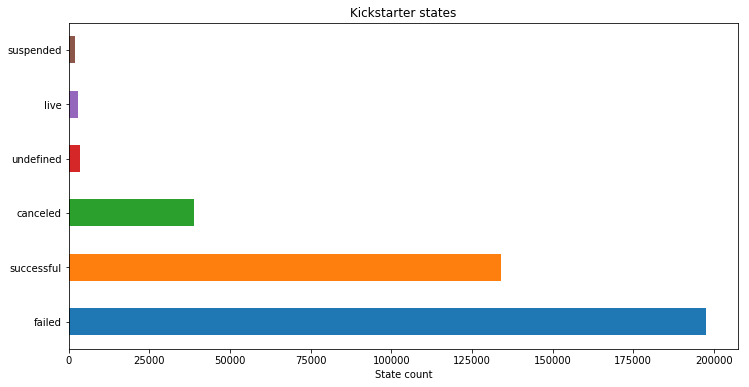

In [9]:
# Plot kickstarter states
plt.rcParams['figure.figsize'] = [12,6]
plt.title('Kickstarter states')
plt.xlabel('State count')
success.value_counts().plot(kind='barh')

In [10]:

kickstart_data.head()

,category,state,backers,country,pledged,goal,duration,pledge_percent
0,Publishing,failed,0,GB,0.0,1533.95,59,0.000000
1,Film & Video,failed,15,US,2421.0,30000.00,60,0.080700
2,Film & Video,failed,3,US,220.0,45000.00,45,0.004889
3,Music,failed,1,US,1.0,5000.00,30,0.000200
4,Film & Video,canceled,14,US,1283.0,19500.00,56,0.065795


In [15]:
kickstart_data.describe()

,backers,pledged,goal,duration,pledge_percent
count,378661.000000,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05
mean,105.617476,9.058924e+03,4.545440e+04,34.481095,3.236121e+02
std,907.185035,9.097334e+04,1.152950e+06,65.909173,2.669054e+04
min,0.000000,0.000000e+00,1.000000e-02,1.000000,0.000000e+00
25%,2.000000,3.100000e+01,2.000000e+03,30.000000,4.533333e-01
50%,12.000000,6.243300e+02,5.500000e+03,30.000000,1.346400e+01
75%,56.000000,4.050000e+03,1.550000e+04,37.000000,1.065400e+02
max,219382.000000,2.033899e+07,1.663614e+08,16739.000000,1.042779e+07


In [12]:
#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
#X = data.drop('state', 1)
#Y = data['state']
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

#cross_val_score(rfc, X, Y, cv=10)

# Source:
Kickstarter Data Page - 
https://www.kaggle.com/kemical/kickstarter-projects/data